In [39]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('BBCNews.csv')
df.info

<bound method DataFrame.info of       Unnamed: 0                                              descr  \
0              0  chelsea sack mutu  chelsea have sacked adrian ...   
1              1  record fails to lift lacklustre meet  yelena i...   
2              2  edu describes tunnel fracas  arsenals edu has ...   
3              3  ogara revels in ireland victory  ireland flyha...   
4              4  unclear future for striker baros  liverpool fo...   
...          ...                                                ...   
2405        2405  gm in crunch talks on fiat future  fiat will m...   
2406        2406  uk firm faces venezuelan land row  venezuelan ...   
2407        2407  winndixie files for bankruptcy  us supermarket...   
2408        2408  yangtze electrics profits double  yangtze elec...   
2409        2409  algeria hit by further gas riots  algeria suff...   

                                                   tags  
0     sports, stamford bridge, football association,...  

In [10]:
df = df.drop(columns=['Unnamed: 0']) 

In [11]:
df=df.dropna(subset=['descr'])

In [14]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def preprocess(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z\s]','',text)
    tokens=text.split()
    tokens=[word for word in tokens if word not in stop_words and len(word)>2]
    return ' '.join(tokens)
df['clean_text']=df['descr'].apply(preprocess)

In [19]:
count_vectorizer=CountVectorizer(max_df=0.95,min_df=2,stop_words='english')
count_data=count_vectorizer.fit_transform(df['clean_text'])

In [20]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
tfidf_data=tfidf_vectorizer.fit_transform(df['clean_text'])

In [22]:
n_topics=5

lda_model=LatentDirichletAllocation(n_components=n_topics,random_state=42)
lda_topics=lda_model.fit_transform(count_data)

In [24]:
nmf=NMF(n_components=n_topics,random_state=42)
nmf_topics=nmf.fit_transform(tfidf_data)

In [30]:
def display(model,feature_names,n=10):
    for idx,topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n-1:-1]]))
        print()

In [31]:
print("LDA Topics")
display(lda_model,count_vectorizer.get_feature_names_out())

LDA Topics
Topic 1:
said, court, new, law, case, used, yukos, rights, legal, told

Topic 2:
said, year, market, people, new, mobile, growth, sales, digital, phone

Topic 3:
film, best, said, music, years, awards, new, award, year, films

Topic 4:
said, people, government, labour, election, new, blair, party, public, minister

Topic 5:
said, game, world, games, time, play, players, england, win, new



In [32]:
print("LDA Topics")
display(nmf,tfidf_vectorizer.get_feature_names_out())

LDA Topics
Topic 1:
mobile, people, music, said, digital, technology, users, phone, broadband, net

Topic 2:
labour, election, blair, said, brown, party, government, tax, howard, prime

Topic 3:
game, england, win, wales, said, cup, games, play, players, ireland

Topic 4:
growth, economy, said, economic, sales, year, bank, oil, prices, market

Topic 5:
film, best, awards, award, actor, films, actress, oscar, festival, director



In [49]:
def plot_wordclouds(model,features,title):
    for topic_idx,topic in enumerate(model.components_):
        word_freq={features[i]: topic[i] for i in topic.argsort()[-20:]}
        wordcloud=WordCloud(width=800,height=400).generate_from_frequencies(word_freq)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{title} Topic {topic_idx+1}")
        plt.show()

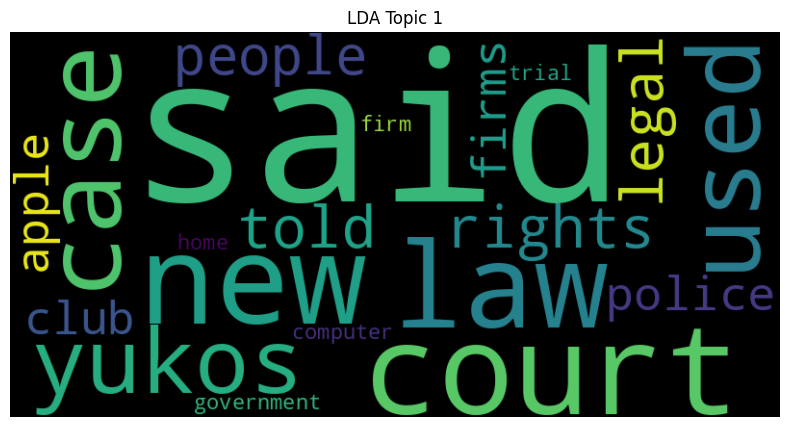

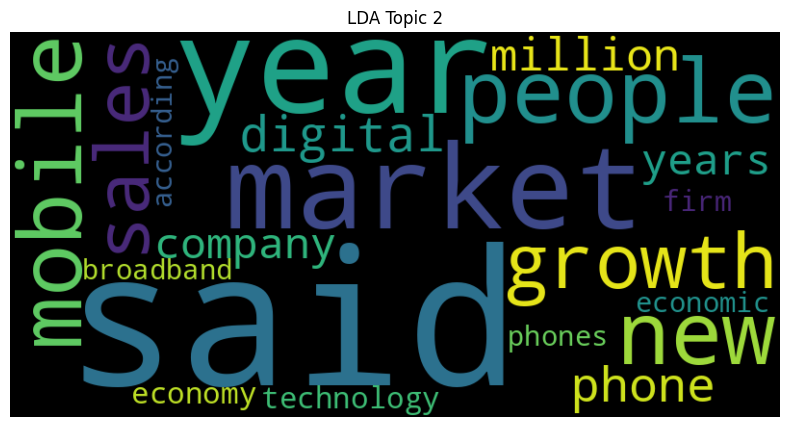

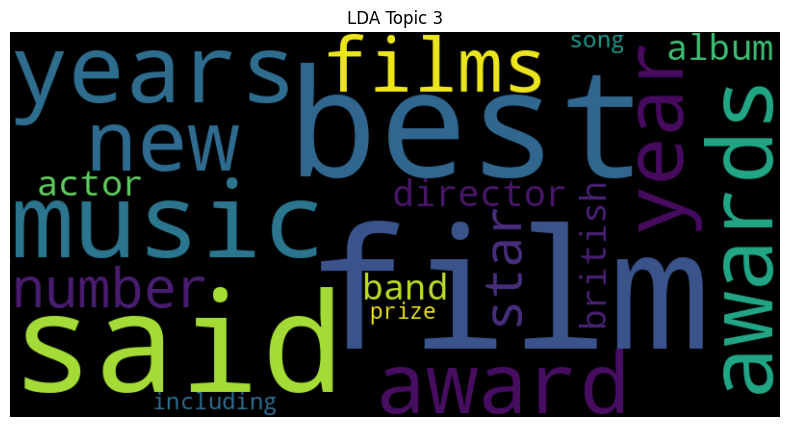

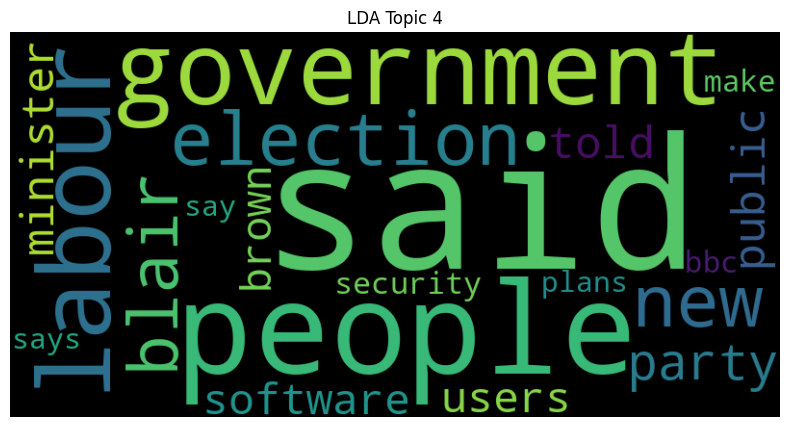

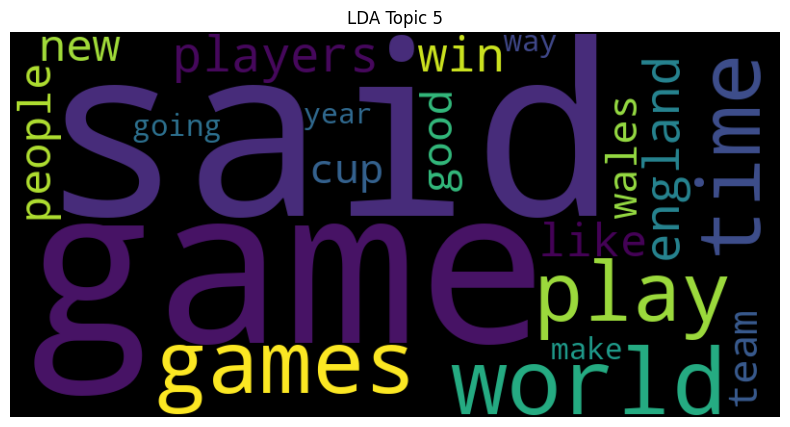

In [50]:
plot_wordclouds(lda_model,count_vectorizer.get_feature_names_out(),title="LDA")

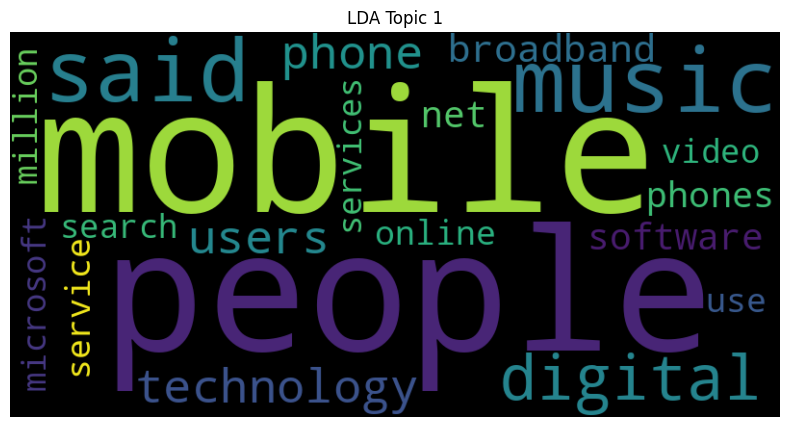

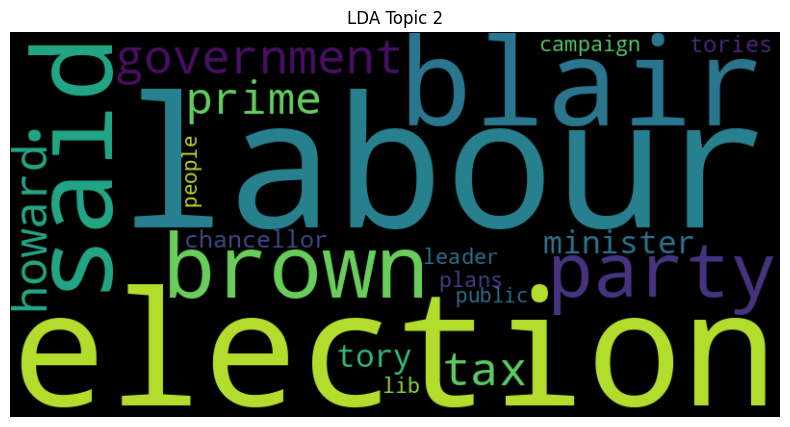

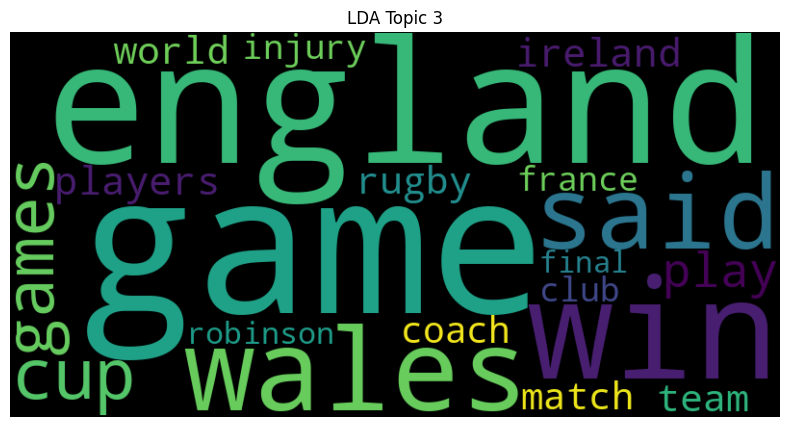

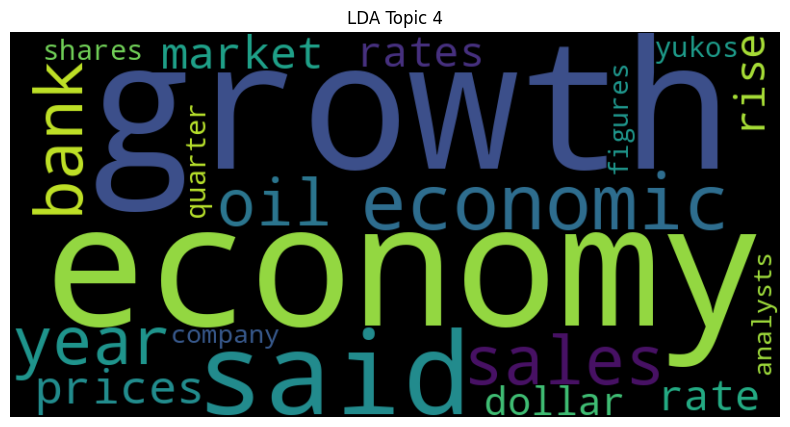

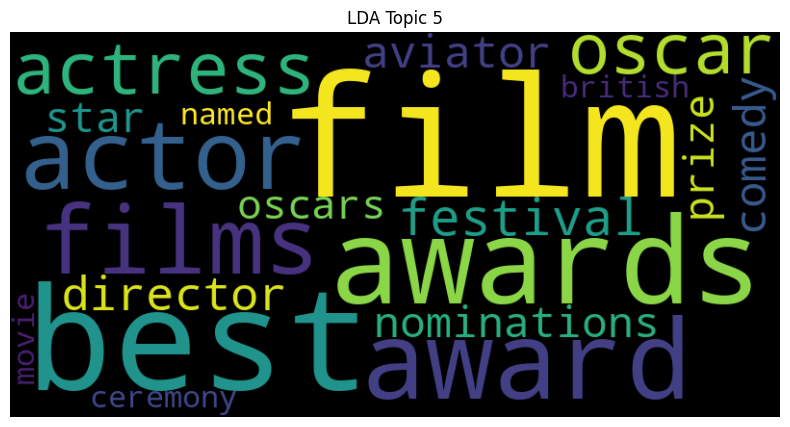

In [51]:
plot_wordclouds(nmf,count_vectorizer.get_feature_names_out(),title="LDA")

In [ ]:
pip install pyLDAvis


   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/2.6 MB 16.8 kB/s eta 0:02:04
Resuming download pyLDAvis-3.4.1-py3-none-any.whl (524 kB/2.6 MB)
   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 1.0/2.6 MB 22.2 kB/s eta 0:01:10
Resuming download pyLDAvis-3.4.1-py3-none-any.whl (1.0 MB/2.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.3 kB/s  0:01:491.4 kB/s eta 0:00:22
   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/26.6 MB ? eta -:--:--9:15
Resuming download gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB/26.6 MB)
   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 11.8/26.6 MB 30.9 kB/s eta 0:08:00

In [ ]:
import pyLDAvis.sklearn
import pyLDAvis

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, count_data, count_vectorizer)
